In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals

In [2]:
data = pd.read_pickle('freeze/freeze_df_GCZ9.pickle')

In [22]:
data.loc['20190121 9:00':].head(40)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2019-01-21 09:37:00,False,1282.4,1282.4,1279.6,1279.9,1281.165950,6701,1281.576597,1288.023437,1.903311,0.0,-1.0,0.0,NaN,NaN,1281.165950
2019-01-21 09:50:00,False,1279.9,1280.3,1277.0,1278.0,1278.800740,6607,1280.651311,1287.870773,1.918944,-1.0,-1.0,-1.0,NaN,1278.800740,NaN
2019-01-21 10:28:00,False,1277.9,1278.5,1277.0,1277.5,1277.813063,6563,1279.705228,1287.704292,1.914256,-1.0,-1.0,-1.0,NaN,1277.813063,NaN
2019-01-21 11:34:00,False,1277.4,1278.3,1276.8,1277.7,1277.649777,6515,1279.020078,1287.537868,1.909620,-1.0,-1.0,-1.0,NaN,1277.649777,NaN
2019-01-21 13:14:00,False,1277.8,1278.7,1276.7,1276.8,1277.898195,6935,1278.646117,1287.378314,1.910631,0.0,-1.0,0.0,NaN,NaN,1277.898195
2019-01-21 14:17:00,False,1276.8,1277.5,1276.0,1276.3,1276.758877,7072,1278.017037,1287.202547,1.906038,-1.0,-1.0,-1.0,NaN,1276.758877,NaN
2019-01-21 15:23:00,False,1276.4,1279.0,1276.2,1278.9,1277.712260,6859,1277.915445,1287.045472,1.916037,0.0,-1.0,0.0,NaN,NaN,1277.712260
2019-01-21 16:02:00,False,1278.9,1280.4,1278.5,1279.2,1279.451958,6604,1278.427616,1286.919794,1.915858,0.0,-1.0,0.0,NaN,NaN,1279.451958
2019-01-21 17:55:00,False,1279.3,1280.2,1278.8,1279.7,1279.505578,6520,1278.786937,1286.797087,1.910089,0.0,-1.0,0.0,NaN,NaN,1279.505578


In [4]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2019-01-29 18:25:00,False,1314.1,1314.6,1312.7,1313.6,1313.783839,6486,1313.932298,1300.571241,2.000506,0.0,1.0,0.0,NaN,NaN,1313.783839
2019-01-29 19:35:00,False,1313.6,1314.9,1313.1,1314.9,1313.735170,6585,1313.866589,1300.788848,1.998286,0.0,1.0,0.0,NaN,NaN,1313.735170
2019-01-29 21:10:00,False,1314.9,1316.2,1314.3,1315.4,1315.335134,6547,1314.356104,1301.029306,1.997198,1.0,1.0,1.0,1315.335134,NaN,NaN
2019-01-30 07:59:00,False,1315.5,1319.7,1314.7,1318.6,1316.285310,6504,1314.999172,1301.281495,2.030447,1.0,1.0,1.0,1316.285310,NaN,NaN
2019-01-30 20:01:00,False,1318.9,1320.0,1313.6,1319.6,1316.385086,6563,1315.461143,1301.531164,2.078828,1.0,1.0,1.0,1316.385086,NaN,NaN


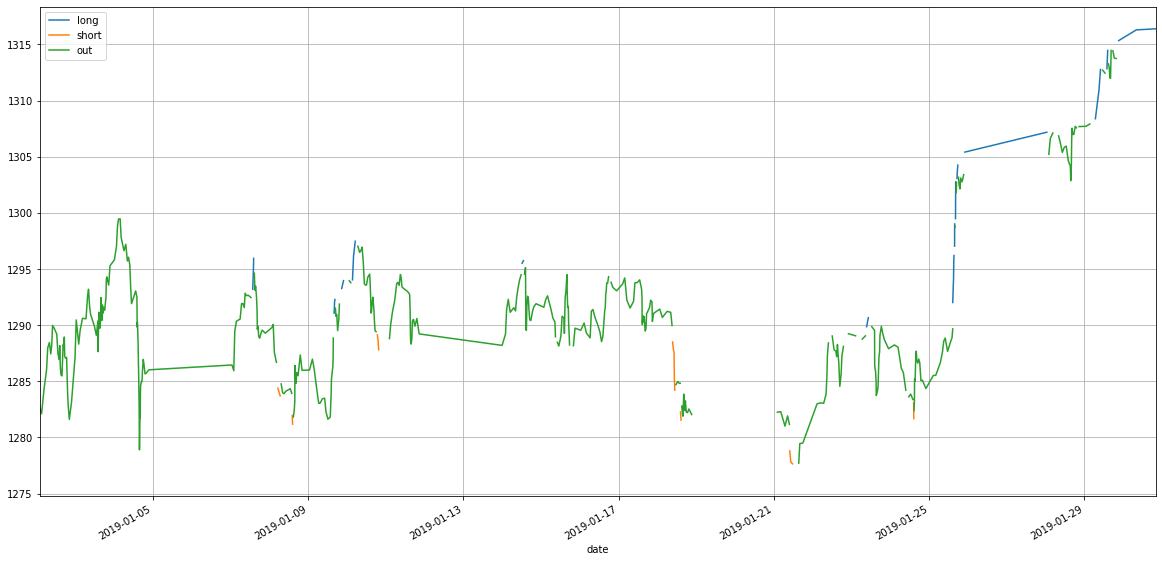

In [5]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [6]:
periods = [10, 20, 40, 80, ]

In [7]:
min_max = pd.DataFrame({'close': data.price})

In [8]:
min_max

,close
date,
2019-01-02 02:14:00,1282.659777
2019-01-02 03:24:00,1282.115731
2019-01-02 04:55:00,1284.312007
2019-01-02 06:28:00,1286.016288
2019-01-02 07:11:00,1287.981868
...,...
2019-01-29 18:25:00,1313.783839
2019-01-29 19:35:00,1313.735170
2019-01-29 21:10:00,1315.335134


In [9]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

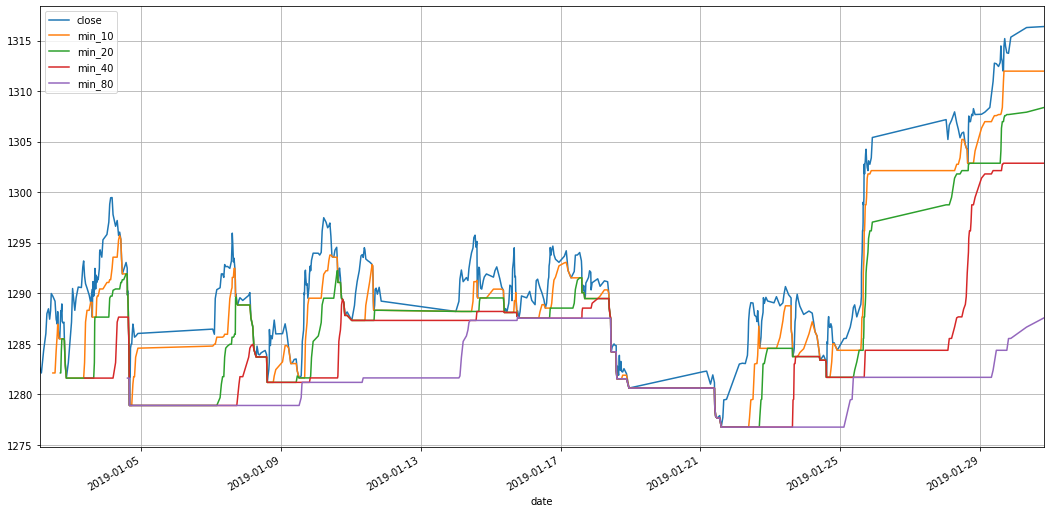

In [10]:
min_max.plot(figsize=(18, 9), grid=True);

In [11]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,


In [12]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2019-01-14 12:24:00,True,1295.1,1296.6,1294.6,1295.2,1295.506983,6484,1294.057179,1290.686983,2.100020,1.0,1.0,1.0,1295.506983,NaN,NaN
2019-01-14 13:13:00,True,1295.2,1296.3,1295.1,1295.6,1295.745829,6497,1294.620062,1290.771712,2.089489,1.0,1.0,1.0,1295.745829,NaN,NaN
2019-01-15 09:21:00,True,1288.2,1288.6,1287.6,1288.2,1288.099672,6502,1289.605224,1290.933384,2.066421,-1.0,-1.0,-1.0,NaN,1288.099672,NaN
2019-01-15 18:02:00,True,1288.1,1288.6,1286.6,1287.7,1287.708161,6475,1289.207538,1290.906579,2.022645,-1.0,-1.0,-1.0,NaN,1287.708161,NaN
2019-01-15 19:17:00,True,1288.0,1288.2,1287.0,1287.4,1287.534368,6476,1288.434229,1290.806811,2.006183,-1.0,-1.0,-1.0,NaN,1287.534368,NaN
2019-01-16 16:52:00,True,1293.6,1295.4,1293.5,1293.7,1294.527611,6642,1293.187939,1290.803888,1.971365,1.0,1.0,1.0,1294.527611,NaN,NaN
2019-01-16 18:39:00,True,1295.0,1295.0,1294.1,1294.3,1294.663319,6496,1294.015723,1290.972829,1.949768,1.0,1.0,1.0,1294.663319,NaN,NaN
2019-01-18 09:25:00,True,1289.6,1289.6,1287.3,1288.7,1288.508732,6512,1289.993981,1291.189576,1.933078,-1.0,-1.0,-1.0,NaN,1288.508732,NaN
2019-01-18 09:51:00,True,1288.7,1289.0,1287.2,1288.1,1287.909881,6550,1289.299281,1291.135238,1.931581,-1.0,-1.0,-1.0,NaN,1287.909881,NaN


In [13]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

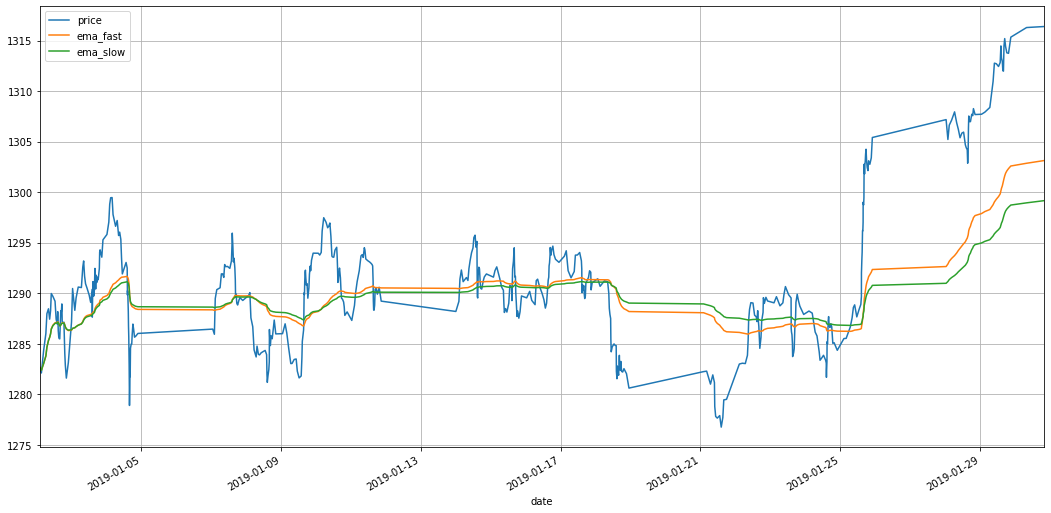

In [14]:
averages.plot(figsize=(18,9), grid=True);

In [15]:
data.loc['20180221':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2019-01-02 02:14:00,True,1285.0,1285.0,1280.8,1281.1,1282.659777,6550,NaN,NaN,4.200000,0.0,NaN,0.0,NaN,NaN,1282.659777
2019-01-02 03:24:00,True,1281.2,1283.8,1281.1,1283.6,1282.115731,6531,NaN,NaN,3.445833,0.0,NaN,0.0,NaN,NaN,1282.115731
2019-01-02 04:55:00,True,1283.6,1285.4,1282.7,1284.7,1284.312007,6507,NaN,NaN,3.194455,0.0,NaN,0.0,NaN,NaN,1284.312007
2019-01-02 06:28:00,True,1284.7,1287.6,1284.1,1286.7,1286.016288,6660,1284.411122,NaN,3.272119,0.0,NaN,0.0,NaN,NaN,1286.016288
2019-01-02 07:11:00,True,1286.7,1289.5,1286.6,1289.3,1287.981868,6628,1285.781882,NaN,3.196032,0.0,NaN,0.0,NaN,NaN,1287.981868
2019-01-02 08:15:00,True,1289.3,1289.4,1287.4,1287.5,1288.461751,6489,1286.761142,NaN,2.991115,0.0,NaN,0.0,NaN,NaN,1288.461751
2019-01-02 09:04:00,True,1287.5,1288.1,1286.7,1287.8,1287.436598,6531,1287.000291,NaN,2.756167,0.0,NaN,0.0,NaN,NaN,1287.436598
2019-01-02 09:42:00,True,1287.8,1290.1,1286.9,1289.7,1288.277096,6962,1287.443173,NaN,2.813827,0.0,NaN,0.0,NaN,NaN,1288.277096
2019-01-02 10:11:00,True,1289.6,1290.8,1289.2,1289.5,1289.975086,6601,1288.309684,NaN,2.672886,0.0,NaN,0.0,NaN,NaN,1289.975086
